# Q1) Delivery_time -> Predict delivery time using sorting time

In [18]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset
dataset=pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### EDA and Data_Visualisation

In [4]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

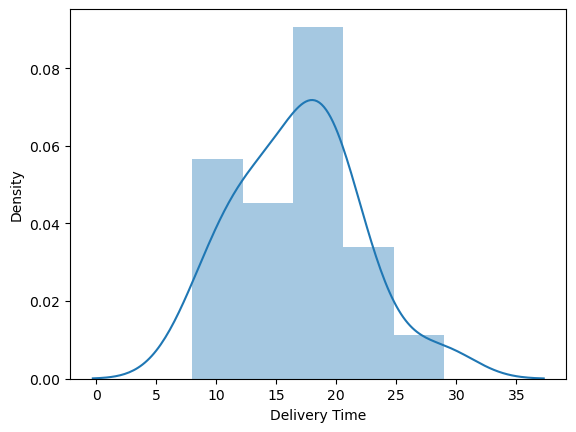

In [9]:
sns.distplot(dataset['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

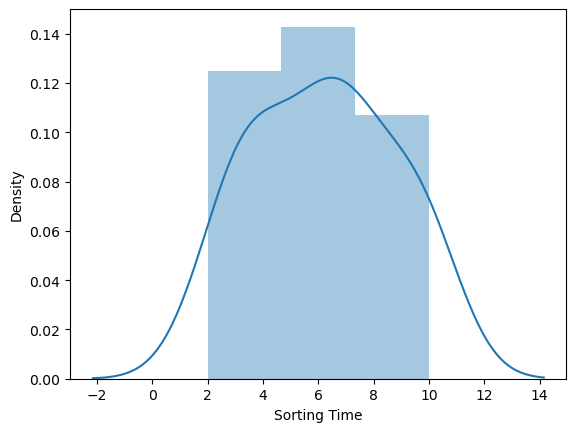

In [10]:
sns.distplot(dataset['Sorting Time'])

### Feature Engineering

In [11]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


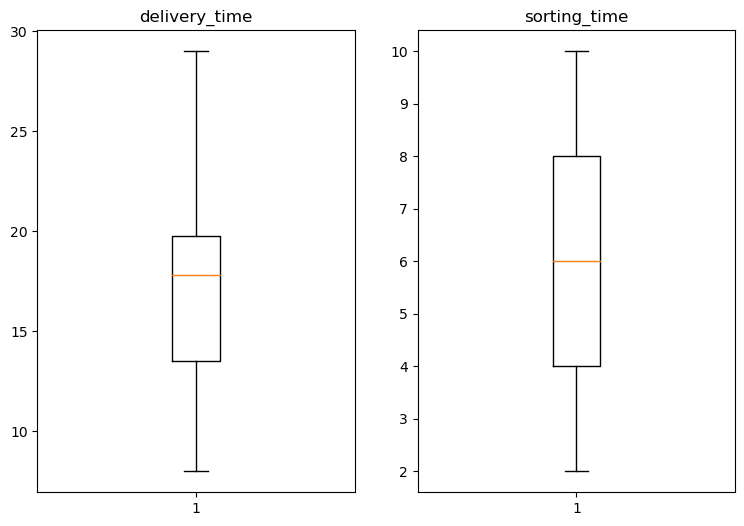

In [22]:
#Plotting the data to check for outliers
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(dataset['delivery_time'])
plt.title('delivery_time')
plt.subplot(122)
plt.boxplot(dataset['sorting_time'])
plt.title('sorting_time')
plt.show()

### Correlation Analysis

In [12]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

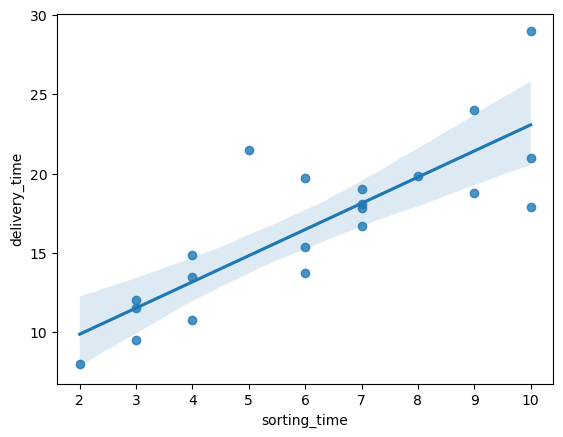

In [15]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

### Model Building

In [16]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

### Model Testing

In [23]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [26]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [27]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

### Model Predictions

In [29]:
# Manual prediction for say sorting time 6
# y=Beta0 + Beta1 * x
delivery_time = (6.582734) + (1.649020)*(6)
delivery_time

16.476854

In [30]:
# Automatic Prediction for say sorting time 6, 9
new_data=pd.Series([6,9])
new_data

0    6
1    9
dtype: int64

In [31]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,9


In [32]:
model.predict(data_pred)

0    16.476853
1    21.423913
dtype: float64

#### So, this Predicted values of Delivery time increases when Sorting time increases.

## ----------------------------------------------------------------------------------------------------------------------------------

# Q2) Salary_hike -> Build a prediction model for Salary_hike

In [50]:
df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### EDA and Data_Visualisation

In [35]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

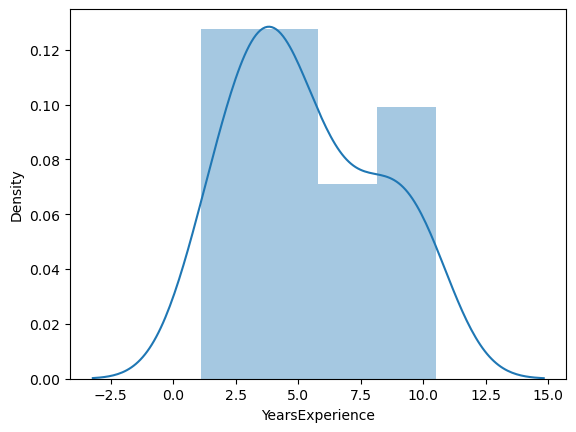

In [37]:
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

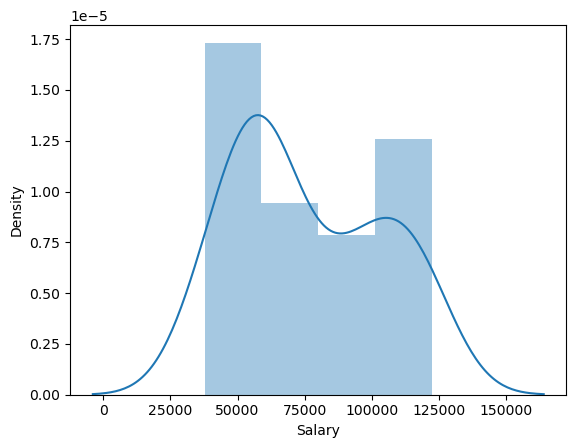

In [38]:
sns.distplot(df['Salary'])

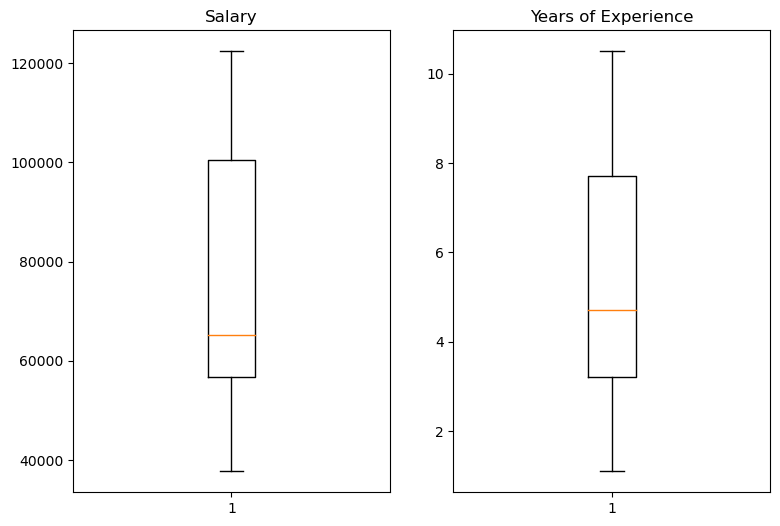

In [51]:
#Plotting the data to check for outliers
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.show()

### Feature Engineering

In [52]:
df=df.rename({'YearsExperience':'years_experience', 'Salary':'salary'},axis=1)
df

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [53]:
df.corr()

,years_experience,salary
years_experience,1.000000,0.978242
salary,0.978242,1.000000


<AxesSubplot:xlabel='years_experience', ylabel='salary'>

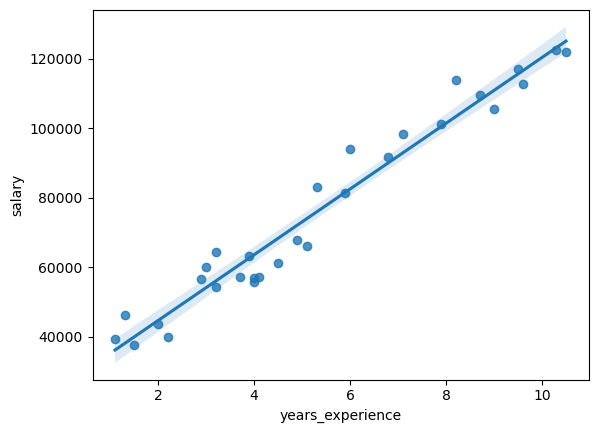

In [54]:
sns.regplot(x=df['years_experience'],y=df['salary'])

### Model Building

In [55]:
model1=smf.ols("salary~years_experience",data=df).fit()

### Model Testing

In [56]:
# Finding Cefficient Parameters
model1.params

Intercept           25792.200199
years_experience     9449.962321
dtype: float64

In [57]:
# Finding Pvalues and tvalues
model1.tvalues, model1.pvalues

(Intercept           11.346940
 years_experience    24.950094
 dtype: float64,
 Intercept           5.511950e-12
 years_experience    1.143068e-20
 dtype: float64)

### Model Predictions

In [58]:
# Manual prediction for say 3 Years Experience
salary = (25792.200199) + (9449.962321)*(3)
salary

54142.087162

In [59]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data1=pd.Series([3,5])
new_data1

0    3
1    5
dtype: int64

In [63]:
data_pred1=pd.DataFrame(new_data1,columns=['years_experience'])
data_pred1

,years_experience
0,3
1,5


In [64]:
model1.predict(data_pred1)

0    54142.087163
1    73042.011806
dtype: float64

#### So, above predict values represents salary hike for 3 and 5 years of exp.